<a href="https://colab.research.google.com/github/louisowen6/Cloud-Python/blob/master/Cloud_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can install your desired package just like in your usual Jupyter Notebook

In [1]:
!pip install matplotlib

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [0]:
import warnings
warnings.filterwarnings("ignore")

# Mount the Google Drive

You have to mount your google drive first, so you can import the dataset located in your google drive. 

1) Click the link

2) Sign in to your google account

3) Copy the authorization code

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.1MB/s 


# Importing Data

You have to copy the dataset link located in your google drive. 

1) Right click on your dataset

2) Click Get Sharable Link

3) Copy that link

In [6]:
link ='https://drive.google.com/open?id=15K3j6k3BbjFWxcWwlDTtYQ8pkgM5s_IR'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mall_cust_segment.csv')  
df = pd.read_csv('mall_cust_segment.csv',index_col='CustomerID')

15K3j6k3BbjFWxcWwlDTtYQ8pkgM5s_IR


# Email Notification Setup

If you are using gmail, you have to turn on the 'Less Secure Apps' in your gmail settings. You can see this blog if there is any login problem:

https://www.afternerd.com/blog/how-to-send-an-email-using-python-and-smtplib/

In [0]:
import smtplib

def send_mail(sender,password,recipient,subject,body):
  message = 'Subject: {}\n\n{}'.format(subject, body)
  try:
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.login(sender,password)
    server.sendmail(sender,recipient,message)
    server.quit()
    print('Email Sent!')
  except:
    print('Something went wrong...')

In [8]:
from getpass import getpass
sender=input("Enter your Email: ")
password = getpass("Enter your Password: ")
recipient=input("Enter the Recipient's Email: ")

Enter your Email: louis.owen.work@gmail.com
Enter your Password: ··········
Enter the Recipient's Email: louis.owen.work@gmail.com


# EDA

In [9]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


In [0]:
df.Gender=df.Gender.replace('Male',1)
df.Gender=df.Gender.replace('Female',0)
df.Gender=pd.Categorical(df.Gender)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null category
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: category(1), int64(3)
memory usage: 6.5 KB


In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
df.groupby('Gender').median()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
0,35.0,60.0,50.0
1,37.0,62.5,50.0


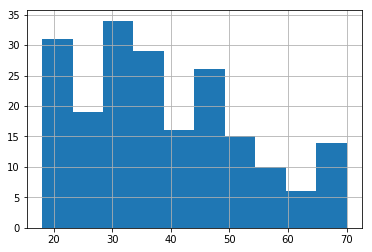

In [14]:
df['Age'].hist()

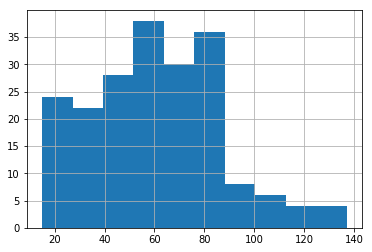

In [15]:
df['Annual Income (k$)'].hist()

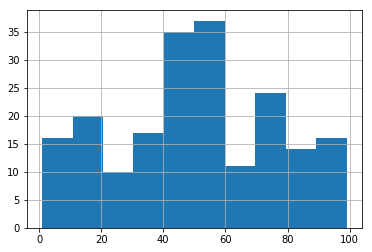

In [16]:
df['Spending Score (1-100)'].hist()

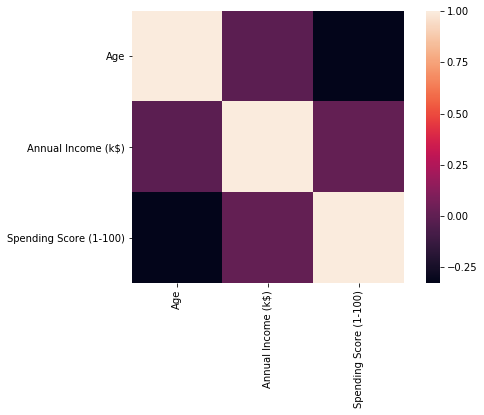

In [17]:
numeric_feats=df.dtypes[df.dtypes!='object'].index
corr_mat=df[numeric_feats].corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat,vmax=1,square=True)

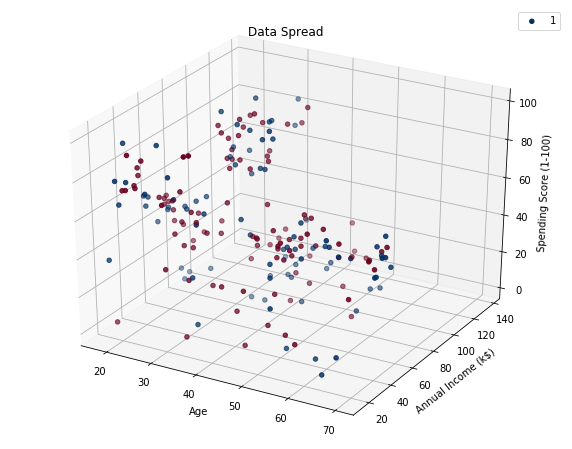

In [18]:
fig=plt.figure(figsize=(10, 8))
ax=plt.axes(projection="3d")
scatter=ax.scatter3D(df.loc[:,'Age'],df.loc[:,'Annual Income (k$)'],df.loc[:,'Spending Score (1-100)'],c=df.loc[:,'Gender'],cmap='RdBu')
ax.legend(df.loc[:,'Gender'])
plt.title('Data Spread')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Data Preprocessing 

In [19]:
scaler=preprocessing.StandardScaler()
scaled_df=df.copy()
scaled_df[['Age','Annual Income (k$)','Spending Score (1-100)']]=scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,-1.424569,-1.738999,-0.434801
2,1,-1.281035,-1.738999,1.195704
3,0,-1.352802,-1.700830,-1.715913
4,0,-1.137502,-1.700830,1.040418
5,0,-0.563369,-1.662660,-0.395980


# K-Means

In [20]:
subject=input("Enter the Email's Subject: ")
body=input("Enter your message: ")

Enter the Email's Subject: Elbow Method Progress
Enter your message: Elbow Method Done. Go check the progress as soon as possible!


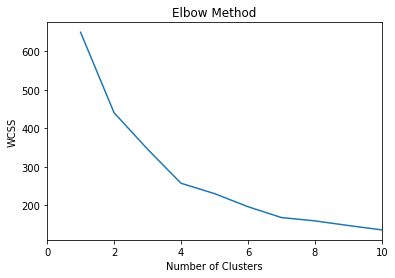

In [21]:
WCSS=[]
for i in range(1,11,1):
    kmeans=MiniBatchKMeans(n_clusters=i,init='k-means++',random_state=0,verbose=False)
    kmeans.fit(scaled_df)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11,1),WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xlim([0,10])
plt.show()

**Sending the email to the recipient's email**

In [22]:
print('Sending your email to ',recipient)
send_mail(sender,password,recipient,subject,body)

Sending your email to  louis.owen.work@gmail.com
Email Sent!


In [0]:
kmeans=MiniBatchKMeans(n_clusters=4 ,init='k-means++',random_state=0,verbose=False)
segment=kmeans.fit(scaled_df)

In [24]:
subject=input("Enter the Email's Subject: ")
body=input("Enter your message: ")

Enter the Email's Subject: PCA Segmentation Plot Progress
Enter your message: PCA plot done. Go check the progress as soon as possible


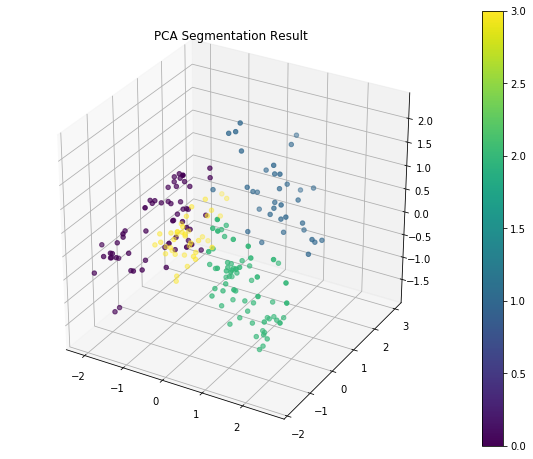

In [25]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(scaled_df)
df_pca=pd.DataFrame(df_pca,columns=['pca_1','pca_2','pca_3'])

fig=plt.figure(figsize=(10, 8))
ax=plt.axes(projection="3d")
scatter=ax.scatter3D(df_pca.loc[:,'pca_1'],df_pca.loc[:,'pca_2'],df_pca.loc[:,'pca_3'],c=segment.labels_,cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA Segmentation Result')
plt.show()

**Sending the email to the recipient's email**

In [26]:
print('Sending your email to ',recipient)
send_mail(sender,password,recipient,subject,body)

Sending your email to  louis.owen.work@gmail.com
Email Sent!


# Segmentation Result

In [0]:
df['segment']=segment.labels_

In [28]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),segment
CustomerID,,,,,
1,1,19,15,39,0
2,1,21,15,81,0
3,0,20,16,6,0


In [29]:
df[df.segment==0].describe()

,Age,Annual Income (k$),Spending Score (1-100),segment
count,59.000000,59.000000,59.000000,59.0
mean,25.389831,41.050847,59.322034,0.0
std,5.617144,17.666863,18.866537,0.0
min,18.000000,15.000000,6.000000,0.0
25%,21.000000,24.000000,47.000000,0.0
50%,24.000000,40.000000,55.000000,0.0
75%,30.500000,58.500000,73.000000,0.0
max,38.000000,72.000000,99.000000,0.0


In [30]:
df[df.segment==1].describe()

,Age,Annual Income (k$),Spending Score (1-100),segment
count,35.000000,35.000000,35.000000,35.0
mean,40.885714,88.142857,17.428571,1.0
std,10.843191,16.424771,10.497299,0.0
min,19.000000,71.000000,1.000000,1.0
25%,34.000000,77.000000,10.000000,1.0
50%,42.000000,85.000000,16.000000,1.0
75%,47.000000,97.500000,23.500000,1.0
max,59.000000,137.000000,40.000000,1.0


In [31]:
df[df.segment==2].describe()

,Age,Annual Income (k$),Spending Score (1-100),segment
count,66.000000,66.000000,66.000000,66.0
mean,53.424242,47.893939,40.439394,2.0
std,9.720811,14.584638,15.872694,0.0
min,35.000000,18.000000,3.000000,2.0
25%,47.250000,39.000000,35.000000,2.0
50%,51.000000,49.000000,46.000000,2.0
75%,62.250000,60.000000,51.000000,2.0
max,70.000000,79.000000,60.000000,2.0


In [32]:
df[df.segment==3].describe()

,Age,Annual Income (k$),Spending Score (1-100),segment
count,40.000000,40.000000,40.000000,40.0
mean,32.875000,86.100000,81.525000,3.0
std,3.857643,16.339036,9.999968,0.0
min,27.000000,69.000000,58.000000,3.0
25%,30.000000,74.750000,74.000000,3.0
50%,32.000000,78.500000,83.000000,3.0
75%,36.000000,94.000000,90.000000,3.0
max,40.000000,137.000000,97.000000,3.0


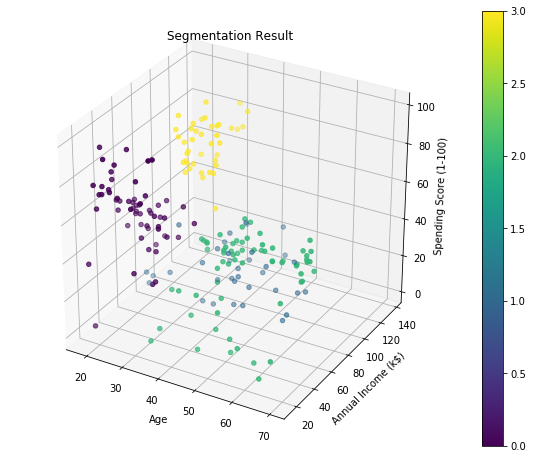

In [33]:
fig=plt.figure(figsize=(10, 8))
ax=plt.axes(projection="3d")
scatter=ax.scatter3D(df.loc[:,'Age'],df.loc[:,'Annual Income (k$)'],df.loc[:,'Spending Score (1-100)'],c=segment.labels_,cmap='viridis')
plt.colorbar(scatter)
plt.title('Segmentation Result')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Segment 0: Young age, low annual income, high spending score

Segment 1: Middle age, high annual income, low spending score

Segment 2: Middle age, medium annual income, medium spending score

Segment 3: Young age, high annual income, high spending score